# Tutorial: SP1 bindings in Cre-driver mouse lines. 

 In this tutorial, we will analyze the binding of the transcription factor Sp1, collected using cre-dependant calling cards from a Syn1::Cre-driver mouse line. Bulk unfused (Brd4 directed) data was also collected as backgound. This dataset contains two time points: day 10(P10) and day 28(P28). The dataset is from [Cammack et al., PNAS. (2020)](https://www.pnas.org/doi/10.1073/pnas.1918241117), and it can be downloaded from [GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE128493).
 
 
 In this tutorial, we will call peaks, make annotation, and perfrom differential peak analysis. There are 271946 insertions in the SP1 P10 qbed file, 1083099 insertions in the SP1 P28 qbed file, and 5573110 insertions in the brd4 qbed file.

In [1]:
import pycallingcards as cc
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 150

We start by reading the qbed datafile. In this file, each row represents a Sp1-directed insertion and columns indicate the chromosome, start point and end point, read number, the direction and the sample barcode of each insertion. For example, the first row means one insertion is on Chromosome 1, and starts from 3095378 and ends on 3095382. The reads number is 7 with direction going from 3' to 5'. The barcode of the cell is TAAGG. We give it the group column to distinguish between groups. 

Use ```cc.rd.read_qbed(filename)``` to read your own qbed data.

In [2]:
SP1_P10 = cc.datasets.SP1_Cre_data(data = "SP1_P10")
SP1_P10['group'] = 'P10'
SP1_P10

,Chr,Start,End,Reads,Direction,Barcodes,group
0,chr1,3095378,3095382,7,+,TAAGG,P10
1,chr1,3120128,3120132,1,+,GTTAC,P10
2,chr1,3121275,3121279,10,-,GTTAC,P10
3,chr1,3121275,3121279,2,-,GTTAC,P10
4,chr1,3222947,3222951,1,-,GTTAC,P10
...,...,...,...,...,...,...,...
271941,chrY,1010004,1010008,1,-,GTTAC,P10
271942,chrY,1011155,1011159,12,-,GTTAC,P10
271943,chrY,1178766,1178770,10,+,GTTAC,P10
271944,chrY,1244787,1244791,11,+,GTTAC,P10


In [3]:
SP1_P28 = cc.datasets.SP1_Cre_data(data = "SP1_P28")
SP1_P28['group'] = 'P28'
SP1_P28

,Chr,Start,End,Reads,Direction,Barcodes,group
0,chr1,3071865,3071869,76,+,GTCAT,P28
1,chr1,3095378,3095382,7,+,ACTGC,P28
2,chr1,3102707,3102711,1,-,GTCAT,P28
3,chr1,3119905,3119909,4,+,GTCAT,P28
4,chr1,3120189,3120193,66,-,GTCAT,P28
...,...,...,...,...,...,...,...
1083094,chrY,90803579,90803583,14,-,GTCAT,P28
1083095,chrY,90805130,90805134,10,+,ACTGC,P28
1083096,chrY,90805130,90805134,1,+,CGAAA,P28
1083097,chrY,90806531,90806535,5,-,GTCAT,P28


To call differential peaks, we first combine the two qbed files together.

In [4]:
SP1 = cc.rd.combine_qbed([SP1_P10, SP1_P28])
SP1

,Chr,Start,End,Reads,Direction,Barcodes,group
0,chr1,3071865,3071869,76,+,GTCAT,P28
1,chr1,3095378,3095382,7,+,TAAGG,P10
2,chr1,3095378,3095382,7,+,ACTGC,P28
3,chr1,3102707,3102711,1,-,GTCAT,P28
4,chr1,3119905,3119909,4,+,GTCAT,P28
...,...,...,...,...,...,...,...
1355040,chrY,90803579,90803583,14,-,GTCAT,P28
1355041,chrY,90805130,90805134,10,+,ACTGC,P28
1355042,chrY,90805130,90805134,1,+,CGAAA,P28
1355043,chrY,90806531,90806535,5,-,GTCAT,P28


The insertions might be mapped unlocalized or unplaced, we now clean it here.

In [5]:
SP1 = cc.pp.clean_qbed(SP1)
SP1

,Chr,Start,End,Reads,Direction,Barcodes,group
0,chr1,3071865,3071869,76,+,GTCAT,P28
1,chr1,3095378,3095382,7,+,TAAGG,P10
2,chr1,3095378,3095382,7,+,ACTGC,P28
3,chr1,3102707,3102711,1,-,GTCAT,P28
4,chr1,3119905,3119909,4,+,GTCAT,P28
...,...,...,...,...,...,...,...
1355040,chrY,90803579,90803583,14,-,GTCAT,P28
1355041,chrY,90805130,90805134,10,+,ACTGC,P28
1355042,chrY,90805130,90805134,1,+,CGAAA,P28
1355043,chrY,90806531,90806535,5,-,GTCAT,P28


We then read the brd4 background file.

In [6]:
bg = cc.datasets.SP1_Cre_data(data = "background")
bg

,Chr,Start,End,Reads,Direction,Barcodes
0,chr1,3004272,3004276,5,+,ACTGC
1,chr1,3028063,3028067,6,-,ACTGC
2,chr1,3043241,3043245,1,-,ACTGC
3,chr1,3049117,3049121,1,-,CAGTG
4,chr1,3052152,3052156,1,+,ACTGC
...,...,...,...,...,...,...
5573105,chrY,90811001,90811005,2,+,CAGTG
5573106,chrY,90811001,90811005,1,+,CAGTG
5573107,chrY,90811001,90811005,1,+,CAGTG
5573108,chrY,90811001,90811005,2,+,TGACA


In [7]:
bg = cc.pp.clean_qbed(bg)
bg

,Chr,Start,End,Reads,Direction,Barcodes
0,chr1,3004272,3004276,5,+,ACTGC
1,chr1,3028063,3028067,6,-,ACTGC
2,chr1,3043241,3043245,1,-,ACTGC
3,chr1,3049117,3049121,1,-,CAGTG
4,chr1,3052152,3052156,1,+,ACTGC
...,...,...,...,...,...,...
5573105,chrY,90811001,90811005,2,+,CAGTG
5573106,chrY,90811001,90811005,1,+,CAGTG
5573107,chrY,90811001,90811005,1,+,CAGTG
5573108,chrY,90811001,90811005,2,+,TGACA


We next need to call peaks to identify potential Sp1 binding sites. Three different methods ('CCcaller', 'MACCs', 'Blockify') are available along with three different species ('hg38', 'mm10', 'sacCer3'). 

Here, we use ***MACCs*** in *mouse*('mm10') data.  *window_size* is the most important parameter for *MACCs*, and it is highly related to the length of a peak. 1000-1200 is a good fit for *window_size*. *step_size* is another important parameter and it controls how careful we are looking into the chromosomes. 500-800 is good for *step_size*. *pvalue_cutoffTTAA* is the pvalue cutoff for TTAA data and *pvalue_cutoffbg* is pvalue cutoff for the background qbed data. Normally, the setting for *pvalue_cutoffbg* is considerably higher than *pvalue_cutoffTTAA*. *pvalue_cutoffbg* is recommended from 0.00001 to 0.01 and *pvalue_cutoffTTAA* is recommended from 0.001 to 0.1. The setting of *pseudocounts* is largely influenced by library size. For the first time of trial, it can be adjusted to $10^{6}-10^{-5} \times$ the number of insertions.

In [8]:
peak_data = cc.pp.call_peaks(SP1, bg, method = "MACCs", reference = "mm10", pvalue_cutoffbg = 0.001, 
                             window_size = 1000, step_size = 500, pvalue_cutoffTTAA = 0.00001, 
                             lam_win_size = 1000000, pseudocounts = 0.1, record = True, save = "peak.bed")
peak_data

For the MACCs method with background, [expdata, background, reference, pvalue_cutoffbg, pvalue_cutoffTTAA, lam_win_size, window_size, step_size, extend, pseudocounts, test_method, min_insertions, record] would be utilized.


100%|██████████| 21/21 [04:43<00:00, 13.50s/it]


,Chr,Start,End,Center,Experiment Insertions,Background insertions,Reference Insertions,pvalue Reference,pvalue Background,Fraction Experiment,TPH Experiment,Fraction background,TPH background,TPH background subtracted,pvalue_adj Reference
0,chr1,3399656,3400345,3400068.0,21,69,8,0.000000e+00,1.745466e-04,0.000015,1549.993948,1.238144e-05,1238.144320,311.849628,0.000000e+00
1,chr1,3672013,3673193,3672213.0,61,47,9,0.000000e+00,0.000000e+00,0.000045,4502.363372,8.433737e-06,843.373667,3658.989705,0.000000e+00
2,chr1,4773450,4774236,4773657.0,6,5,4,2.405425e-08,1.939280e-04,0.000004,442.855414,8.972060e-07,89.720603,353.134811,6.323087e-06
3,chr1,4785206,4786550,4785472.0,31,47,13,0.000000e+00,2.298502e-08,0.000023,2288.086304,8.433737e-06,843.373667,1444.712637,0.000000e+00
4,chr1,5016489,5017564,5017023.0,8,10,8,1.672281e-09,3.938477e-04,0.000006,590.473885,1.794412e-06,179.441206,411.032679,4.739980e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10739,chrX,169325223,169325838,169325423.0,11,16,9,5.107026e-15,1.876575e-04,0.000008,811.901592,2.871059e-06,287.105929,524.795662,1.893816e-12
10740,chrX,169799382,169801491,169799905.0,25,29,23,0.000000e+00,3.271381e-07,0.000018,1845.230890,5.203795e-06,520.379497,1324.851393,0.000000e+00
10741,chrX,169829316,169830343,169829658.0,9,9,10,2.746225e-09,1.659074e-04,0.000007,664.283120,1.614971e-06,161.497085,502.786035,7.671705e-07
10742,chrX,169878786,169879561,169879328.0,19,21,10,0.000000e+00,1.379092e-06,0.000014,1402.375476,3.768265e-06,376.826532,1025.548944,0.000000e+00


Approach the above by first combining the data and then call peaks together.

 Although not recommended, you could also try calling peaks seperately and then merging the peaks by [pybedtools](https://daler.github.io/pybedtools/). Below is the code:

```python
import pybedtools
peak_data1 = cc.pp.call_peaks(SP1_P10, bg, method = "MACCs", reference = "mm10", 
                              pvalue_cutoffbg = 0.1, window_size=1500, step_size=500, 
                              lam_win_size = None,  pseudocounts = 0.1, record = True)
peak_data2 = cc.pp.call_peaks(SP1_P28, bg, method = "MACCs", reference = "mm10", 
                              pvalue_cutoffbg = 0.1, window_size=1500, step_size=500, 
                              lam_win_size = None,  pseudocounts = 0.1, record = True)
peak = cc.rd.combine_qbed([peak_data1, peak_data2])
peak = pybedtools.BedTool.from_dataframe(peak).merge().to_dataframe() 
peak_data = peak.rename(columns={"chrom":"Chr", "start":"Start", "end":"End"})

```

In order to choose the suitable method and parameters for peak calling, please take a look at genome areas. We stongly advise to adjust the parameters for ```cc.pp.call_peaks()``` to call better peaks.

In this plot, the colored ones are the experiment qbed data and the gray ones are the background data. The top section shows insertions and their read counts. One dot is an insertion and the height is log(reads+1). The middle section indicates the distribution of insertions. The bottom section represents reference genes and peaks. 

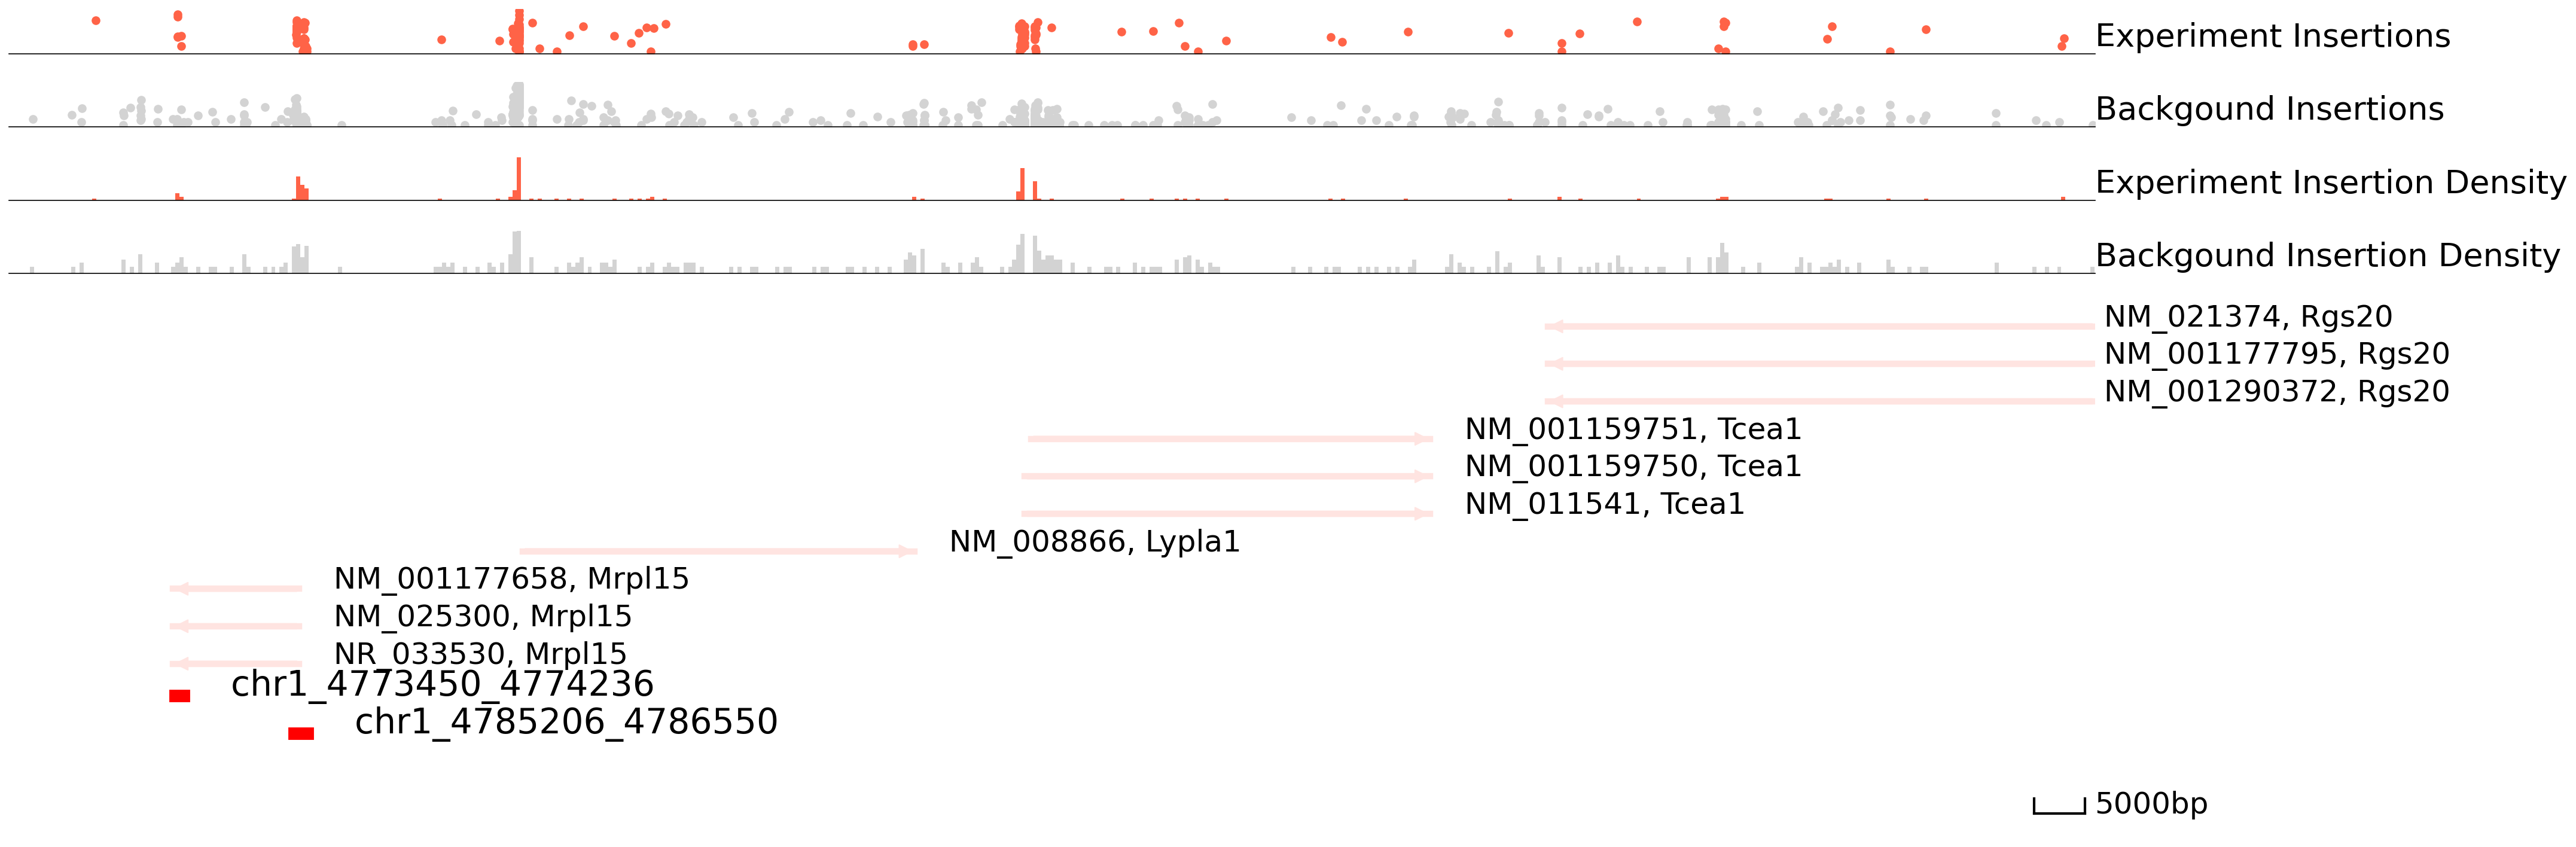

In [9]:
cc.pl.draw_area("chr1", 4856929, 4863861, 100000, peak_data, SP1, "mm10", bg, font_size=2, plotsize = [1,1,6],
                figsize = (30,12), peak_line = 2, save = False, bins = 500, example_length = 5000)

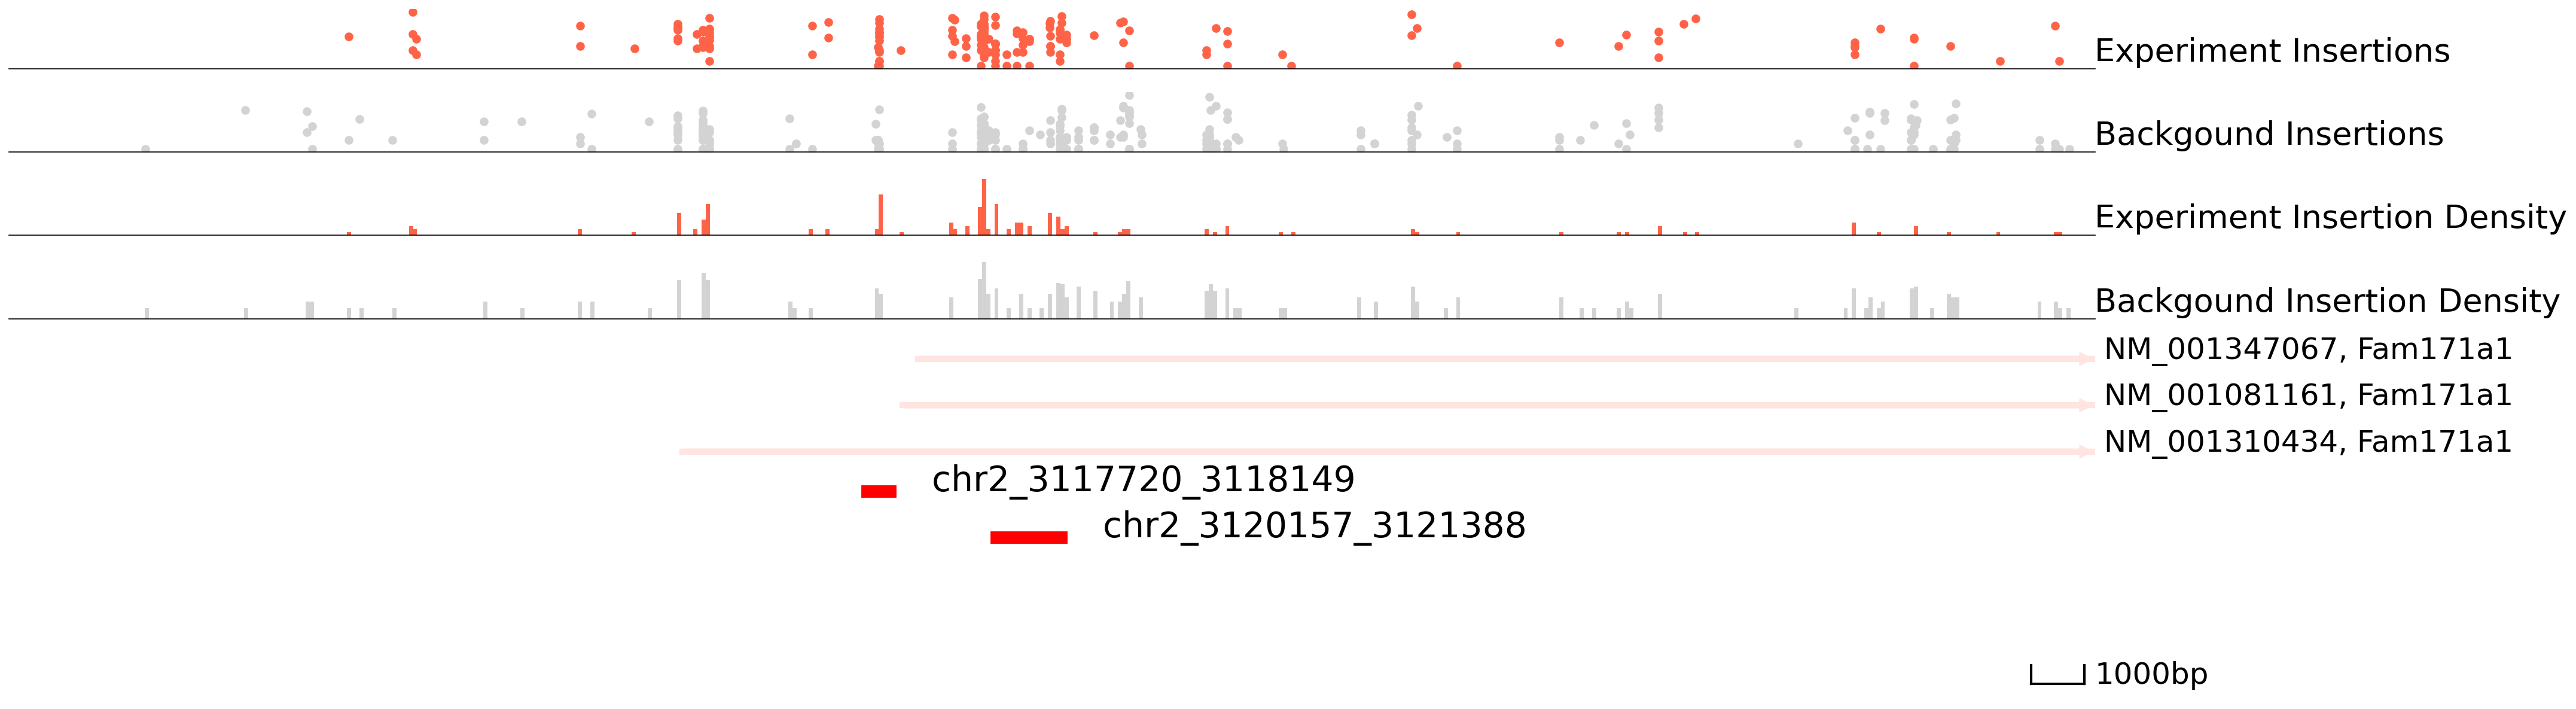

In [10]:
cc.pl.draw_area("chr2", 3116481, 3125943, 15000, peak_data, SP1, "mm10", bg, font_size=2, plotsize = [1,1,3],
                figsize = (30,10), peak_line = 3, save = False, bins = 500, example_length = 1000)

We can also visualize our data directly in the [WashU Epigenome Browser](http://epigenomegateway.wustl.edu/browser/). This can be useful for overlaying your data with other published datasets. Please note that this link only valid for 24hrs, so you will have to rerun it if you want to use it after this time period.

In [11]:
qbed= {"SP1":SP1, "bg":bg}
bed = {'PEAK':peak_data}
cc.pl.WashU_browser_url(qbed, bed, genome = 'mm10')

All qbed addressed
All bed addressed
Uploading files
Please click the following link to see the data on WashU Epigenome Browser directly.
https://epigenomegateway.wustl.edu/browser/?genome=mm10&hub=https://companion.epigenomegateway.org//task/a4f06270936d67281d4c9aa3065922e2/output//datahub.json


Pycallingcards can be used to visual peak locations acorss the genome to see that the distribution of peaks is unbiased and that all chromosomes are represented.

In [12]:
cc.pl.whole_peaks(peak_data, linewidth = 1, reference = "mm10")

We can next use HOMER to look for motifs that are overrepresented under the peaks.  Here, we expect to find the SP1 motif.

In [13]:
cc.tl.call_motif(peaks_frame = peak_data, reference = "mm10", save_homer = "Homer/peak", 
                 homer_path = "/home/juanru/miniconda3/bin/", num_cores=12)

There is no save_name, it will save to temp_Homer_trial.bed and then delete.



	Position file = temp_Homer_trial.bed
	Genome = mm10
	Output Directory = Homer/peak
	Fragment size set to 1000
	Using 12 CPUs
	Will not run homer for de novo motifs
	Found mset for "mouse", will check against vertebrates motifs
	Peak/BED file conversion summary:
		BED/Header formatted lines: 10744
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 10744
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Background files for 1000 bp fragments found.
	Custom genome sequence directory: /home/juanru/miniconda3/share/homer/.//data/genomes/mm10//

	Extracting sequences from directory: /home/juanru/miniconda3/share/homer/.//data/genomes/mm10//
	Extracting 680 sequences from chr1
	Extracting 873 sequences from chr2
	Extracting 561 sequences from chr3
	Extracting 698 sequences from chr4


Finished!



	Preparing HTML output with sequence logos...
		1 of 440 (1e-529) Sp5(Zf)/mES-Sp5.Flag-ChIP-Seq(GSE72989)/Homer
		2 of 440 (1e-371) Sp2(Zf)/HEK293-Sp2.eGFP-ChIP-Seq(Encode)/Homer
		3 of 440 (1e-365) KLF14(Zf)/HEK293-KLF14.GFP-ChIP-Seq(GSE58341)/Homer
		4 of 440 (1e-354) KLF1(Zf)/HUDEP2-KLF1-CutnRun(GSE136251)/Homer
		5 of 440 (1e-294) Sp1(Zf)/Promoter/Homer
		6 of 440 (1e-258) KLF3(Zf)/MEF-Klf3-ChIP-Seq(GSE44748)/Homer
		7 of 440 (1e-251) Maz(Zf)/HepG2-Maz-ChIP-Seq(GSE31477)/Homer
		8 of 440 (1e-229) KLF5(Zf)/LoVo-KLF5-ChIP-Seq(GSE49402)/Homer
		9 of 440 (1e-221) KLF6(Zf)/PDAC-KLF6-ChIP-Seq(GSE64557)/Homer
		10 of 440 (1e-154) Klf9(Zf)/GBM-Klf9-ChIP-Seq(GSE62211)/Homer
		11 of 440 (1e-110) Klf4(Zf)/mES-Klf4-ChIP-Seq(GSE11431)/Homer
		12 of 440 (1e-94) TATA-Box(TBP)/Promoter/Homer
		13 of 440 (1e-74) KLF10(Zf)/HEK293-KLF10.GFP-ChIP-Seq(GSE58341)/Homer
		14 of 440 (1e-63) Egr1(Zf)/K562-Egr1-ChIP-Seq(GSE32465)/Homer
		15 of 440 (1e-58) E2F3(E2F)/MEF-E2F3-ChIP-Seq(GSE71376)/Homer
		16 of 

The Sp1 motif is rank top, and the next motif is highly similar.


<img src="bulk-SP1.png" alt="drawing" width="800"/>

In the next step, we annotate the peaks by their closest genes using [bedtools](https://bedtools.readthedocs.io/en/latest/) and [pybedtools](https://daler.github.io/pybedtools/).
Make sure they are all previously installed before using.

In [14]:
peak_annotation = cc.pp.annotation(peak_data, reference = "mm10")
peak_annotation = cc.pp.combine_annotation(peak_data, peak_annotation)
peak_annotation

In the bedtools method, we would use bedtools in the default path. Set bedtools path by 'bedtools_path' if needed.


,Chr,Start,End,Center,Experiment Insertions,Background insertions,Reference Insertions,pvalue Reference,pvalue Background,Fraction Experiment,...,TPH background subtracted,pvalue_adj Reference,Nearest Refseq1,Gene Name1,Direction1,Distance1,Nearest Refseq2,Gene Name2,Direction2,Distance2
0,chr1,3399656,3400345,3400068.0,21,69,8,0.000000e+00,1.745466e-04,0.000015,...,311.849628,0.000000e+00,NM_001011874,Xkr4,-,0,NM_001195662,Rp1,-,890501
1,chr1,3672013,3673193,3672213.0,61,47,9,0.000000e+00,0.000000e+00,0.000045,...,3658.989705,0.000000e+00,NM_001011874,Xkr4,-,-516,NM_001195662,Rp1,-,617653
2,chr1,4773450,4774236,4773657.0,6,5,4,2.405425e-08,1.939280e-04,0.000004,...,353.134811,6.323087e-06,NR_033530,Mrpl15,-,0,NM_008866,Lypla1,+,33657
3,chr1,4785206,4786550,4785472.0,31,47,13,0.000000e+00,2.298502e-08,0.000023,...,1444.712637,0.000000e+00,NR_033530,Mrpl15,-,0,NM_008866,Lypla1,+,21343
4,chr1,5016489,5017564,5017023.0,8,10,8,1.672281e-09,3.938477e-04,0.000006,...,411.032679,4.739980e-07,NM_001290372,Rgs20,-,0,NM_133826,Atp6v1h,+,65522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10739,chrX,169325223,169325838,169325423.0,11,16,9,5.107026e-15,1.876575e-04,0.000008,...,524.795662,1.893816e-12,NM_001331049,Hccs,-,-4852,NM_009707,Arhgap6,+,-20784
10740,chrX,169799382,169801491,169799905.0,25,29,23,0.000000e+00,3.271381e-07,0.000018,...,1324.851393,0.000000e+00,NM_010797,Mid1,+,0,NR_003635,4933400A11Rik,-,-19748
10741,chrX,169829316,169830343,169829658.0,9,9,10,2.746225e-09,1.659074e-04,0.000007,...,502.786035,7.671705e-07,NM_010797,Mid1,+,0,NM_001290506,Mid1,+,49276
10742,chrX,169878786,169879561,169879328.0,19,21,10,0.000000e+00,1.379092e-06,0.000014,...,1025.548944,0.000000e+00,NM_010797,Mid1,+,0,NM_001290506,Mid1,+,58


Use qbed data, peak data and group names to make a group by peak anndata object.

In [15]:
adata_cc = cc.pp.make_Anndata(SP1, peak_annotation, ["P10", "P28"], key = 'group')
adata_cc

100%|██████████| 21/21 [00:06<00:00,  3.31it/s]


AnnData object with n_obs × n_vars = 2 × 10744
    var: 'Chr', 'Start', 'End', 'Center', 'Experiment Insertions', 'Background insertions', 'Reference Insertions', 'pvalue Reference', 'pvalue Background', 'Fraction Experiment', 'TPH Experiment', 'Fraction background', 'TPH background', 'TPH background subtracted', 'pvalue_adj Reference', 'Nearest Refseq1', 'Gene Name1', 'Direction1', 'Distance1', 'Nearest Refseq2', 'Gene Name2', 'Direction2', 'Distance2'

Filter peaks by minimum count.

In [16]:
cc.pp.filter_peaks(adata_cc, min_counts=5)
adata_cc

AnnData object with n_obs × n_vars = 2 × 10744
    var: 'Chr', 'Start', 'End', 'Center', 'Experiment Insertions', 'Background insertions', 'Reference Insertions', 'pvalue Reference', 'pvalue Background', 'Fraction Experiment', 'TPH Experiment', 'Fraction background', 'TPH background', 'TPH background subtracted', 'pvalue_adj Reference', 'Nearest Refseq1', 'Gene Name1', 'Direction1', 'Distance1', 'Nearest Refseq2', 'Gene Name2', 'Direction2', 'Distance2', 'n_counts'

Differential peak analysis will find out the significant binding for each group. In this example, we use the *Fisher's exact test* to find out.

In [17]:
cc.tl.rank_peak_groups(adata_cc, 'Index', method = 'fisher_exact', key_added = 'fisher_exact')

100%|██████████| 2/2 [00:50<00:00, 25.17s/it]


Plot the differential peak analysis results.

Currently, the peaks are ranked by pvalues. It could also be ranked by logfoldchanges by the following codes:

```python
cc.tl.rank_peak_groups(adata_cc, 'Index', method = 'fisher_exact', key_added = 'fisher_exact',
                       rankby = 'logfoldchanges')
cc.pl.rank_peak_groups(adata_cc, key = 'fisher_exact', rankby = 'logfoldchanges')

```


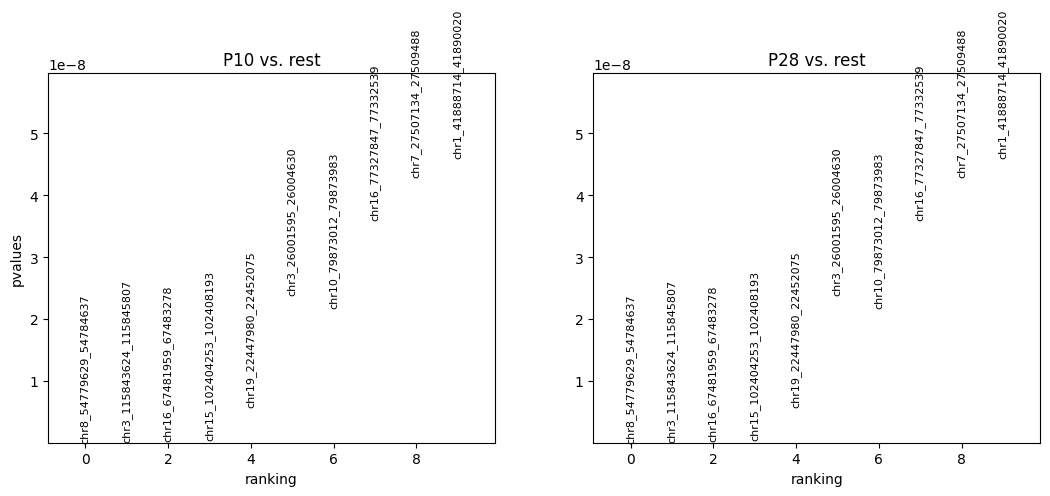

In [18]:
cc.pl.rank_peak_groups(adata_cc, key = 'fisher_exact')

Next, we will visualize differentially bound peaks. The colored datapoints are the insertions specific to a cluster and the grey ones are the total insertions. If we input the backgound file, grey datapoints represent backgound insertions.


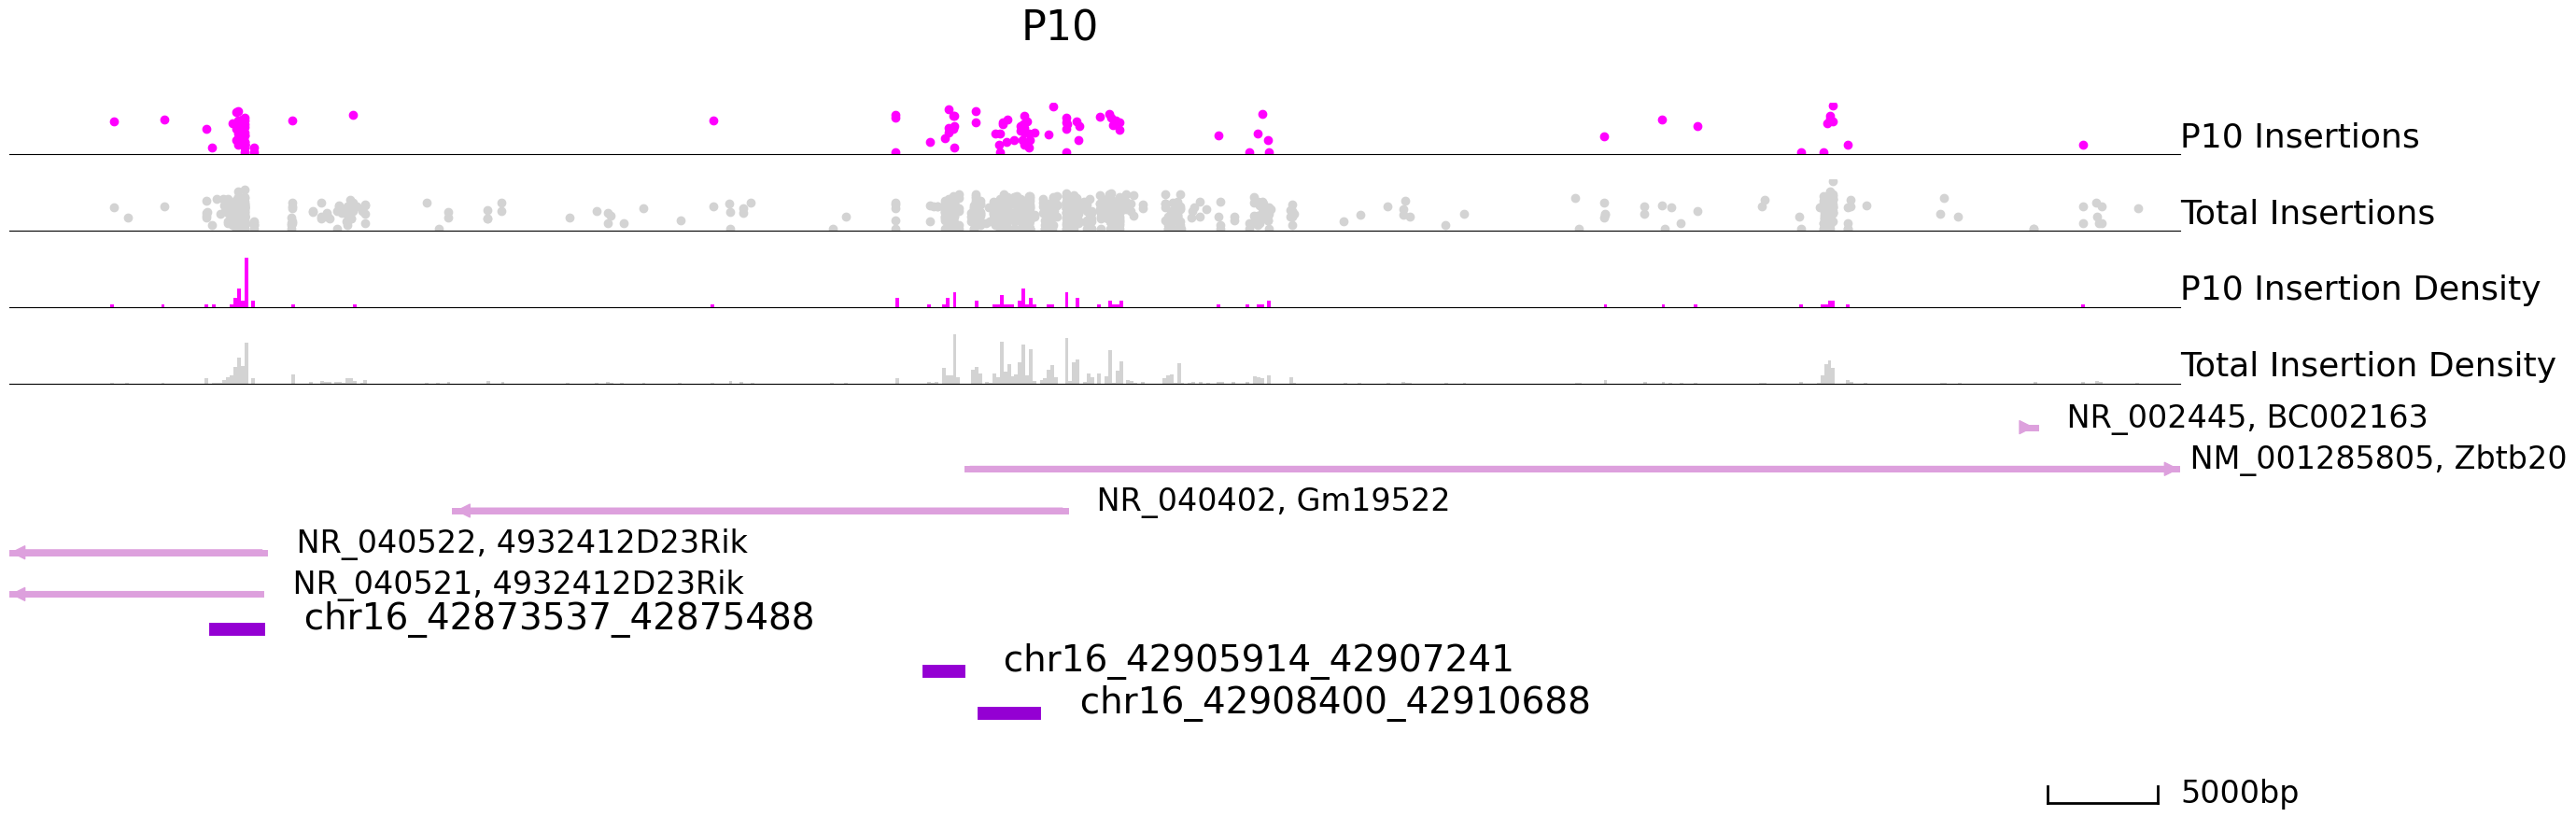

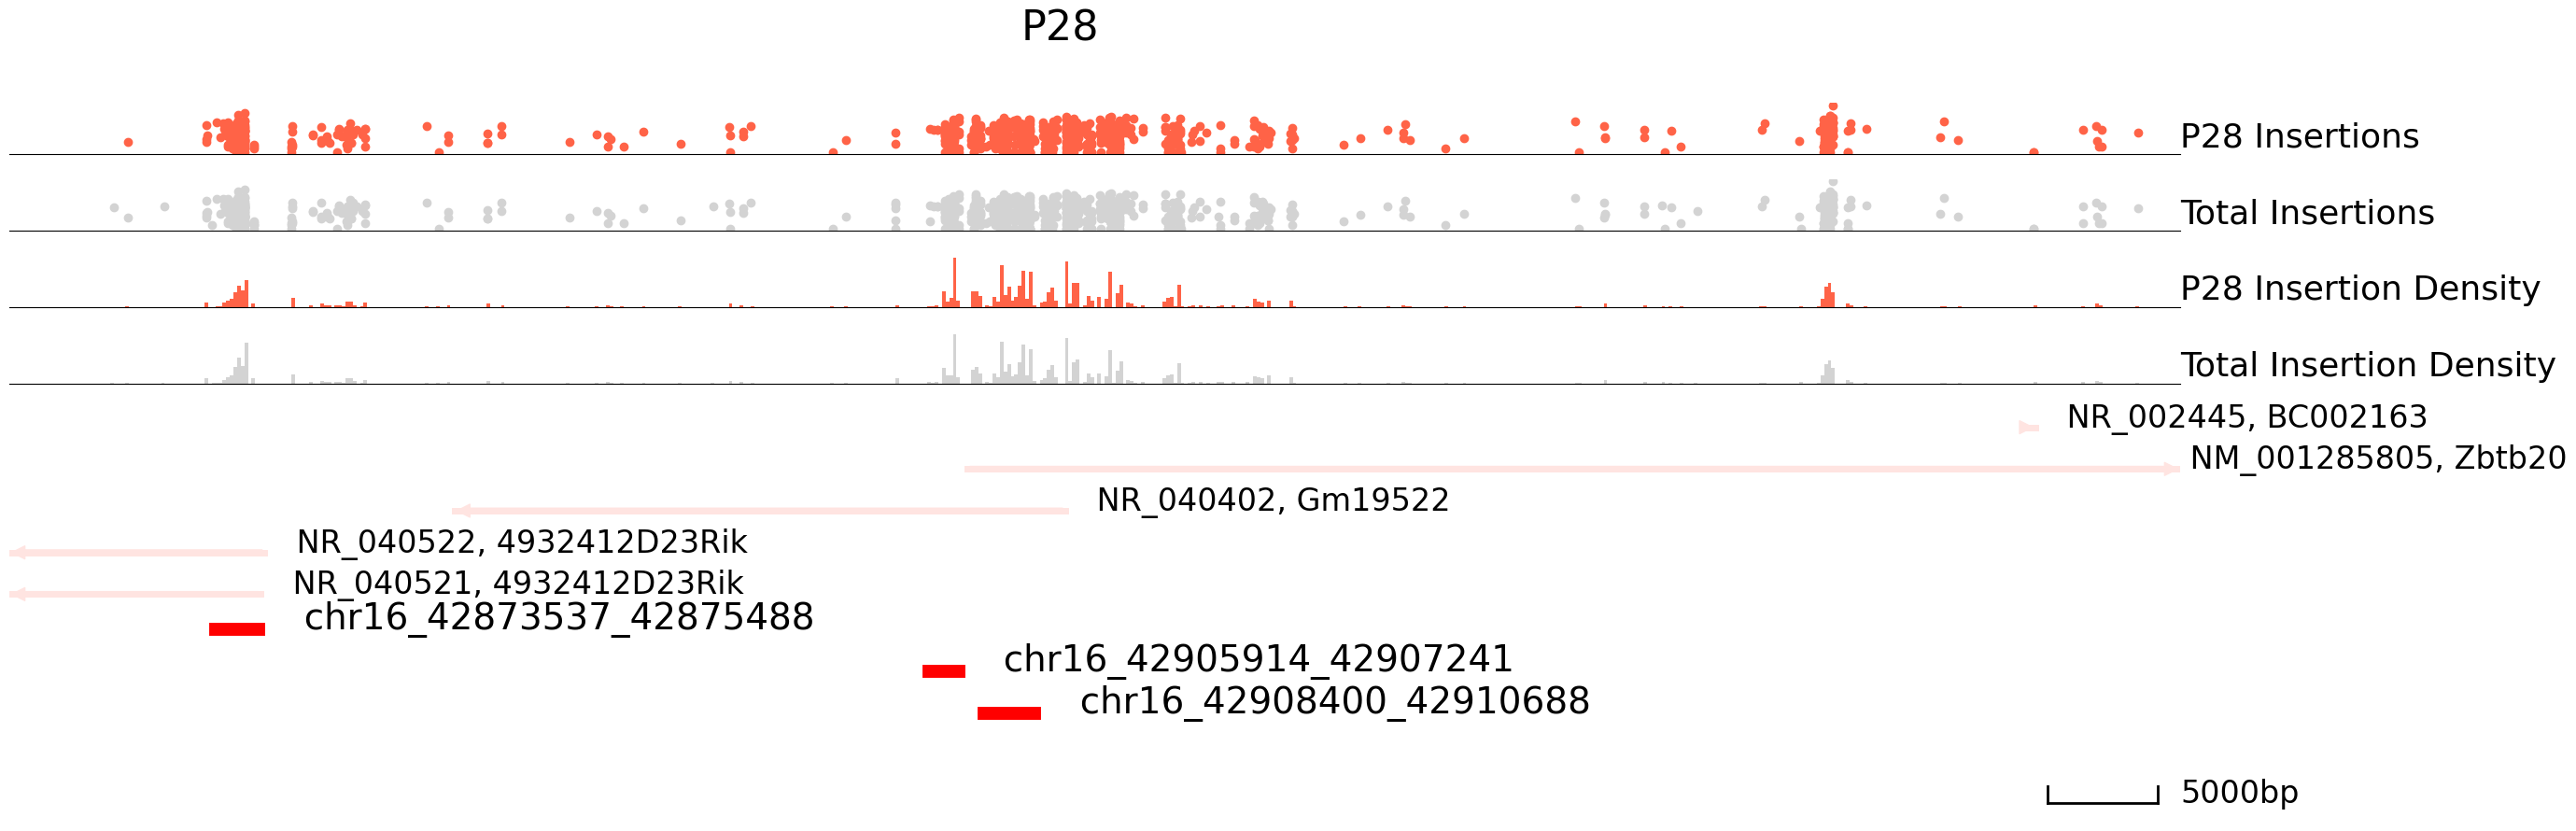

In [19]:
cc.pl.draw_area("chr16", 42904181, 42922657, 40000, peak_data, SP1, "mm10", adata = adata_cc, font_size=2, 
                name = "P10", key = "Index", insertionkey = "group", figsize = (30,10), plotsize = [1,1,4],
                name_insertion1 = 'P10 Insertions', name_density1 = 'P10 Insertion Density',
                name_insertion2 = 'Total Insertions', name_density2 = 'Total Insertion Density',
                peak_line = 3, bins = 600, example_length = 5000, color = "purple", title = "P10")
cc.pl.draw_area("chr16", 42904181, 42922657, 40000, peak_data, SP1, "mm10", adata = adata_cc, font_size=2, 
                name = "P28",key = "Index", insertionkey = "group", figsize = (30,10), plotsize = [1,1,4],
                name_insertion1 = 'P28 Insertions', name_density1 = 'P28 Insertion Density',
                name_insertion2 = 'Total Insertions', name_density2 = 'Total Insertion Density',
                peak_line = 3, bins = 600, example_length = 5000, title = "P28")

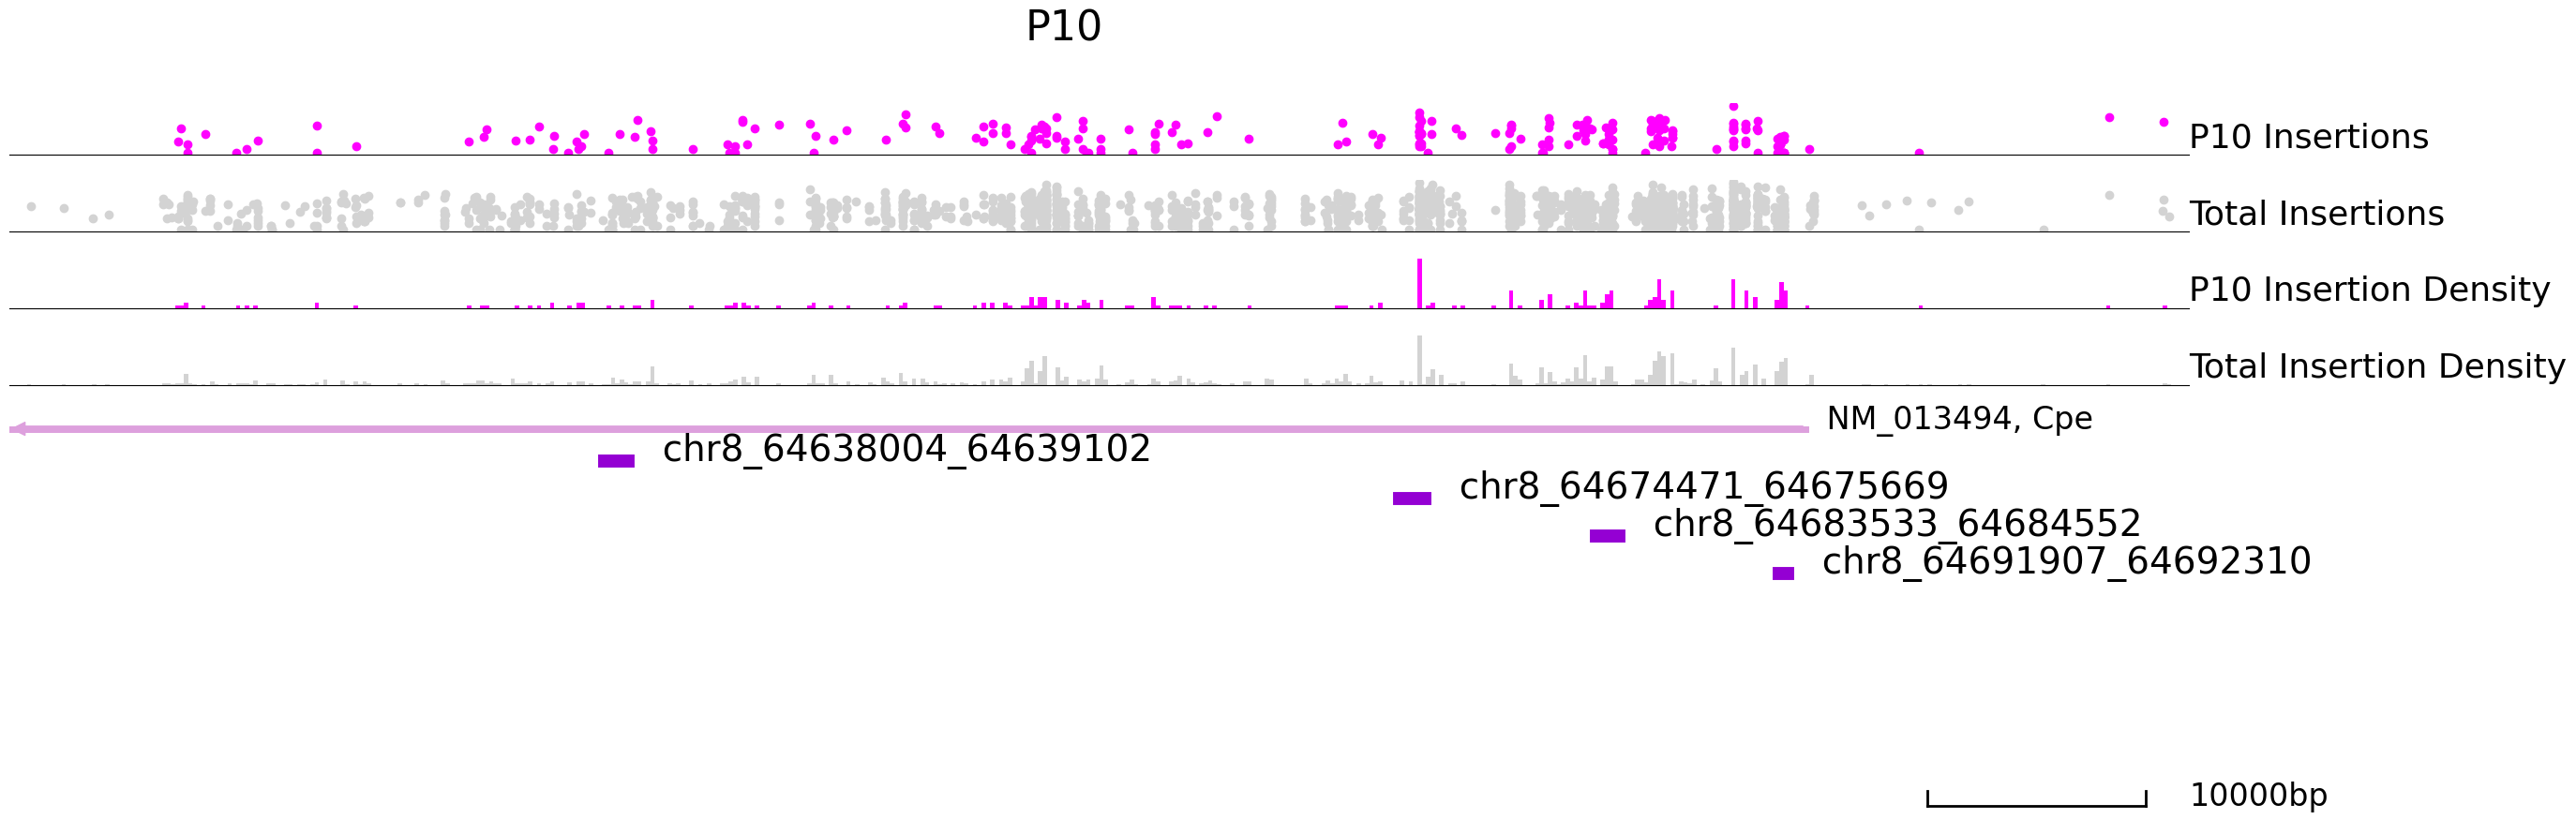

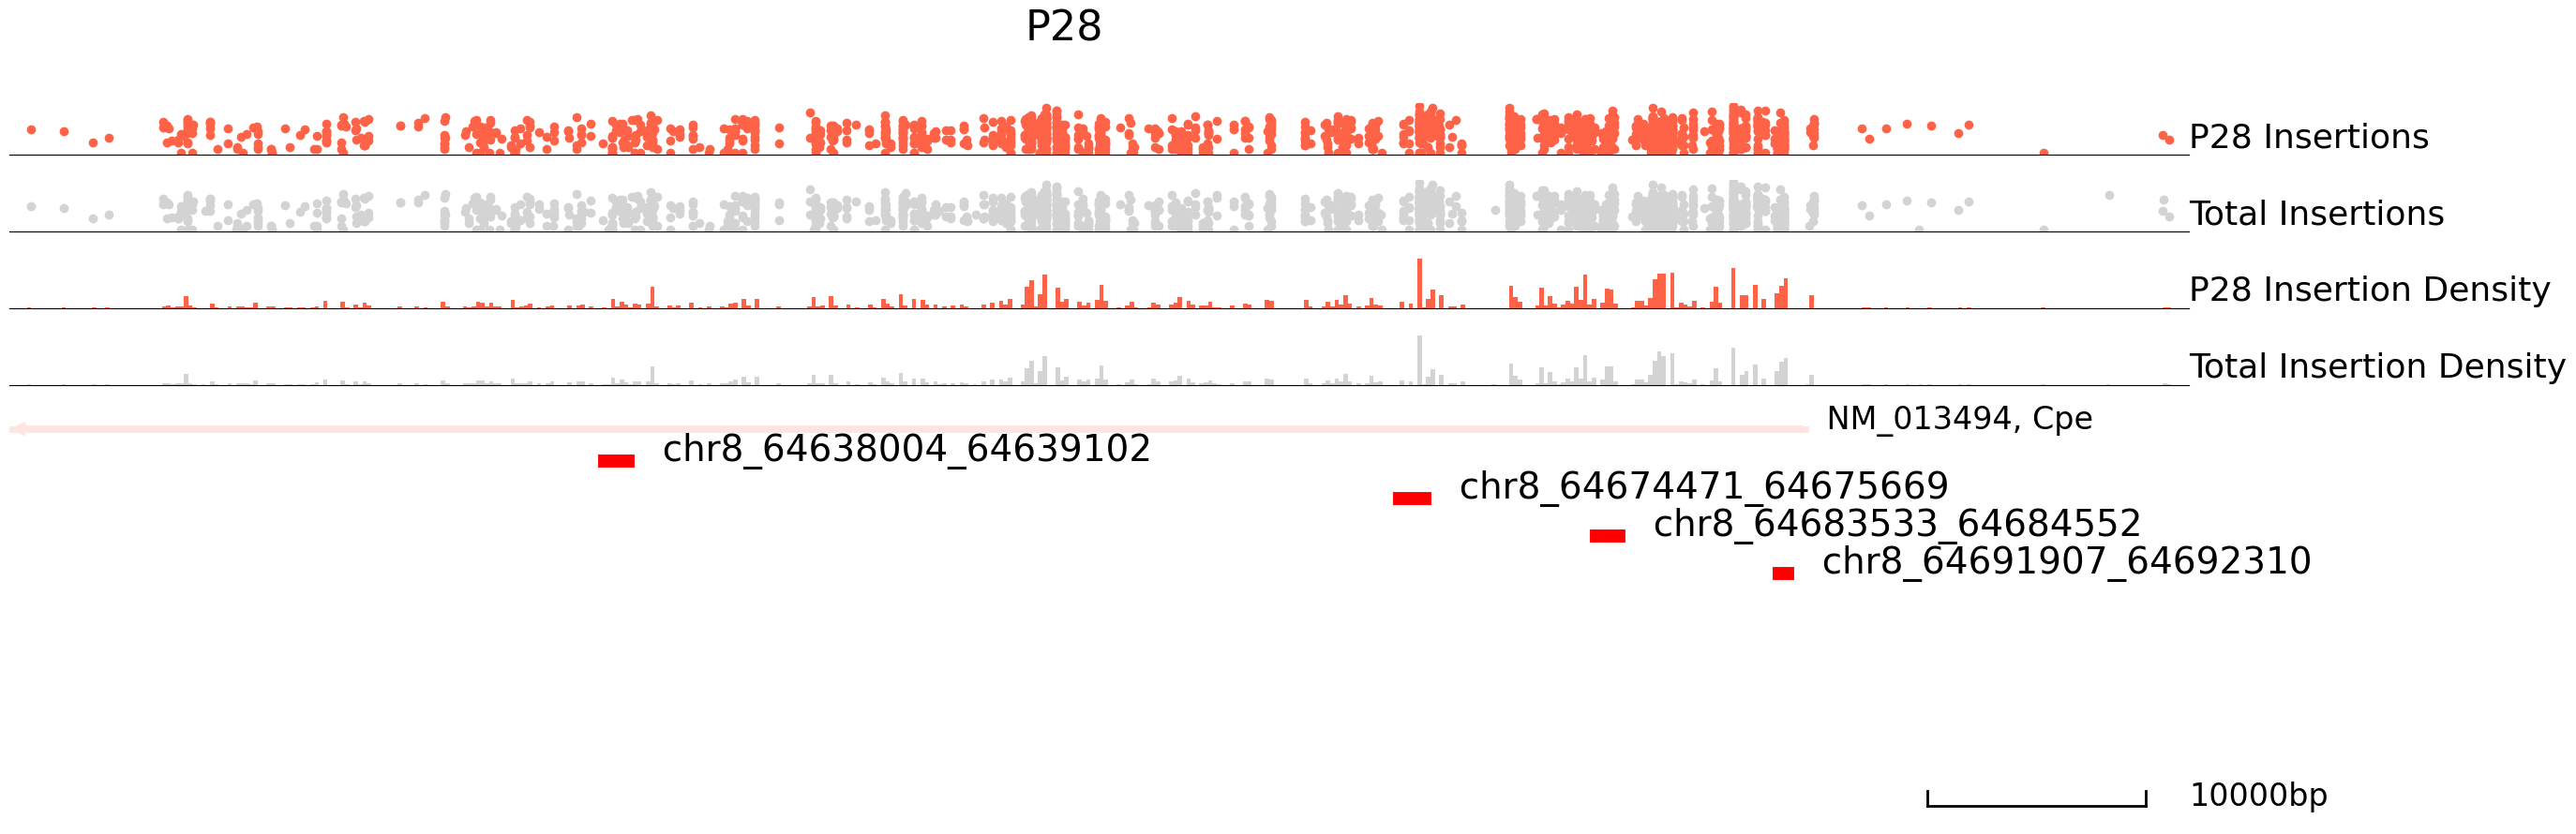

In [20]:
cc.pl.draw_area("chr8", 64630703, 64690703, 20000, peak_data, SP1, "mm10", adata = adata_cc, font_size=2, 
                name = "P10", key = "Index", insertionkey = "group", figsize = (30,10), plotsize = [1,1,4],
                name_insertion1 = 'P10 Insertions', name_density1 = 'P10 Insertion Density',
                name_insertion2 = 'Total Insertions', name_density2 = 'Total Insertion Density',
                bins = 500, peak_line = 8, color = "purple", title = "P10")
cc.pl.draw_area("chr8", 64630703, 64690703, 20000, peak_data, SP1,"mm10", adata = adata_cc, font_size=2, 
                name = "P28", key = "Index", insertionkey = "group", figsize = (30,10), plotsize = [1,1,4],
                name_insertion1 = 'P28 Insertions', name_density1 = 'P28 Insertion Density',
                name_insertion2 = 'Total Insertions', name_density2 = 'Total Insertion Density',
                bins = 500, peak_line = 8, title = "P28")

Plot the volcano plot for differential binding sites.

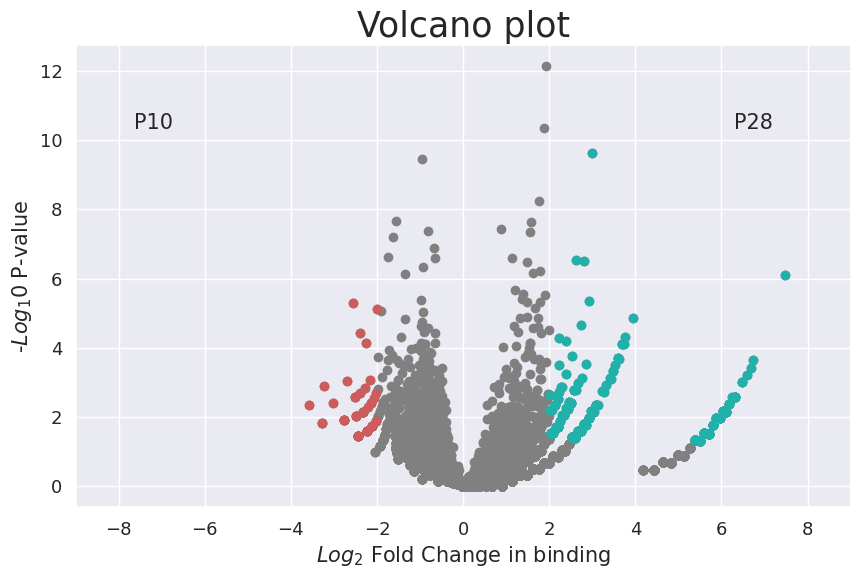

In [21]:
cc.pl.volcano_plot(adata_cc, pvalue_cutoff = 0.05, lfc_cutoff = 2)

This is the heatmap for relative calling cards bindings.

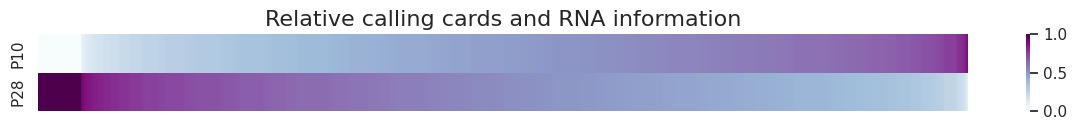

In [22]:
cc.pl.heatmap(adata_cc, figsize=(15,1))

We can see from this plot that P28 has a considerable amount of additional Sp1 binding, as most peaks show increased binding at this timepoint. This is consistent with the experiment design as P28 is the accumulated insertions from day1 to day 28 while P10 reflect the insertions until day 10. 

Save the file if needed.

In [23]:
adata_cc.write("SP1_qbed.h5ad")